# **Deep Neural Network with Keras for MNIST handwritten classification and recognition**


# **Section O : Things to Know**

Understand how to call in or import Keras-Based mathematical layers into your colab environment

Spend time on how a neural network is built and the logic to implement efficient and Optimal Training
 
Networks for image classification
Explore the official documentation about the MNIST Dataset

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


<function matplotlib.pyplot.show>

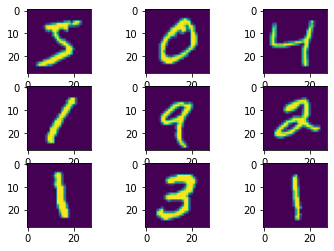

In [ ]:
### Imports ###

### Keras includes the mnist dataset ###
from keras.datasets import mnist 
from keras.utils import to_categorical


### To some example from the mnist dataset let's use maatplotlib and plot the images and other utilities ###
from matplotlib import pyplot 
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
import sys
from numpy import mean
from numpy import std

### Keras Libraries 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization


### Now, let us create the train and test sets - for X (The images themselves) and y (The classification label) ###
(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

### Let's take sneak peak about the count of the images in the set and the resolution of the images ###
print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) ### The train set ###
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

### A for loop to plot and see one each of numbers ###
for image in range(9):
  pyplot.subplot(330 + 1 + image)
  pyplot.imshow( trainsetX[image])
pyplot.show

# **Section I.I : Initial Data Indagation**
Start off by understanding what MNIST Data is in more detail

Note down the dimensions and other practical information about the MNIST dataset

Load in the dataset into your Colab Environment [Using Keras Datasets]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# **Section I.II : Initial EDA**
Explore the datasets descriptive statistics if needed

Create graphs of the counts of each class

Make deductions upon the class distribution

In [ ]:
### Let's start with the datatype of the dataset ###

print( " Data Type of Images: " , trainsetX.dtype )
print( " Data Type of Labels: " , trainsety.dtype )

### The dataset is consistently uint8

 Data Type of Images:  uint8
 Data Type of Labels:  uint8


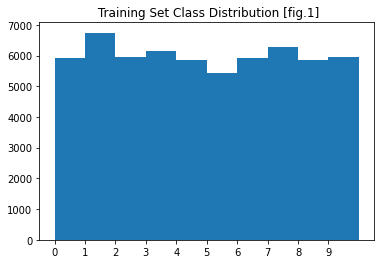

In [ ]:
from matplotlib import pyplot 
figure , axis = pyplot.subplots()
axis.hist(trainsety , bins = range(11))
axis.set_xticks( range(10))
axis.set_title(" Training Set Class Distribution [fig.1]")

figure.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


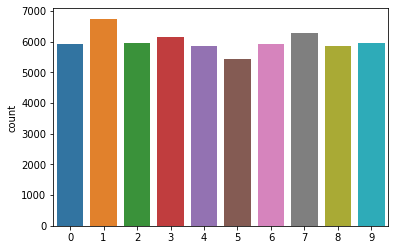

In [ ]:
sns.countplot(trainsety)

In [ ]:
### Loading the Dataset ###

( trainX , trainy ),( testX , testy )= mnist.load_data()

### Reshaping the dataset to contain single colour ###

trainX = trainX.reshape((trainX.shape[0] , 28 , 28 , 1 ))  ### Similarly , 
testX = testX.reshape((testX.shape[0], 28 , 28 , 1 ))


In [ ]:
### One-Hot encoding target values ###

trainy = to_categorical( trainy )
testy = to_categorical( testy )

In [ ]:
def load_dataset():

  ( X_train , y_train), ( X_test , y_test) = mnist.load_data()

  trainX = trainX.reshape(( trainX.shape[0] , 28 , 28 , 1 ))
  testX = testX.reshape((testX.shape[0] , 28 , 28 , 1 ))

  trainy = to_categorical(trainy)
  testy = to_categorical(testy)

  return trainX, trainy, testX, testy

# **Section II : Data Preparation**
Normalize the pixel value of the all images

Why is scaling of the pixel value required ? Make a note
Explain the difference between pre-processed images and the normalized images

In [ ]:
def normalization(train, test):

	# Converstion from integers to floats data type
	train_norma = train.astype('float32')
	test_norma = test.astype('float32')
 
	# Normalize to range 0-1
	train_norma = train_norma / 255.0
	test_norma = test_norma / 255.0

	# Return the normalized images
	return train_norma, test_norma

# **Section III : Model Construction**
What sort of Neural Network would you employ for this problem statement ?

Write down the skeleton flow of the model

Create a baseline model
Train the model

In [ ]:
### CNN Baseline Model ### 

def define_baseline_model():

  model = Sequential()
  model.add(Conv2D( 32 , ( 3 , 3 ) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = ( 28 , 28 , 1)))
  model.add(MaxPooling2D(( 2 , 2 )))
  model.add(Flatten())
  model.add(Dense( 100 , activation='relu' , kernel_initializer='he_uniform' ))
  model.add(Dense( 10 , activation='softmax' ))

  ### Perform Compilation of the model ###
  opt = SGD( lr=0.01 , momentum=0.9 )
  model.compile( optimizer=opt , loss='categorical_crossentropy' , metrics=['accuracy'] )

  ### Return the model ###
  return model

# **Section IV : Model Evaluation**
It is recommeded to to use Kfolds to evaluate your model, what other validation process could you employ ?

What would be the best value for K and why for this baseline model

Evaluate the model accordingly and make a note of it's performance with respect to it's accuracy

In [ ]:
### Model Evaluation function ###

def model_evaluator(datasetX,datasety , n_folds = 5 ):
  scores , histories = list() , list()

  ### Cross Validation Block ###
  kfold = KFold( n_folds , shuffle = True , random_state = 1 )

  ### Performing the Dataset Splits ###
  for trainset_ix,testset_ix in kfold.split(datasetX,datasety):

    ### Model Defination
    model = define_baseline_model()

    ### Selecting appropriate rows for trainset and testset
    trainsetX , trainsety  = datasetX[trainset_ix] , datasety[trainset_ix] 
    testsetX , testsety = datasetX[testset_ix] , datasety[testset_ix] 

    ### Model training or fitting ###
    history = model.fit(trainsetX , trainsety , epochs = 10 , batch_size = 32 , validation_data = (testsetX , testsety), verbose = 1)

    ### Model Evaluation ###
    _ , accuracy = model.evaluate(testsetX , testsety , verbose=1)
    print("Model evalutation accuracy : {}%".format(accuracy * 100.0))

    ### Log the Scores ###
    scores.append(accuracy)
    histories.append(history)

  return scores , histories

# **Section V : Model Evaluation Metrics**
Create Graphical plots of the model performance on the train and test set during individual folds

Is your model overfitting , underfitting or has the optimum fit ? Provide reasoning

Get the loss and validation loss of the model and also the accuracy and the validation accuracy

What are your inferences about the model performance ? Can you summarize your observations ?

In [ ]:
### Diagnostics Function ###
def diagnostics(histories):

  for i in range(len(histories)):

    ### Graphical Visualization of Loss ###
    pyplot.subplot( 2 , 1 , 1 )
    pyplot.title("The Cross Entropy Losses")
    pyplot.plot( histories[i].history['loss'] , color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')

    ### Graphical Visualization of the Accuracies ###
    pyplot.subplot( 2 , 1 , 2 )
    pyplot.title("Classification Accuracy")
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')


In [ ]:
### Summarized Model Performance ### 

def performance_summarizer(scores):

  ### Show the summary ###
  print("Accuracy : mean = {} || Standard Deviation = {} || n = {}".format(mean((scores)*100) , std((scores)*100) , len(scores)))

  ### Box and whisker plots of the output result ###
  pyplot.boxplot(scores)
  pyplot.show()

In [ ]:
def driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Model Evaluation ###
  scores, histories = model_evaluator(trainsetX, trainsety)

  ### Visualizations of the diagnostics ###
  diagnostics(histories)

  ### Visual of the estimation performances ###
  performance_summarizer(scores)

In [ ]:
def BN_model():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
 
  ### Model Compilation ###
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
### BN Model Evaluation function ###

def BN_model_evaluator(datasetX,datasety , n_folds = 5 ):
  scores , histories = list() , list()

  ### Cross Validation Block ###
  kfold = KFold( n_folds , shuffle = True , random_state = 1 )

  ### Performing the Dataset Splits ###
  for trainset_ix,testset_ix in kfold.split(datasetX,datasety):

    ### Model Defination
    model = BN_model()

    ### Selecting appropriate rows for trainset and testset
    trainsetX , trainsety  = datasetX[trainset_ix] , datasety[trainset_ix] 
    testsetX , testsety = datasetX[testset_ix] , datasety[testset_ix] 

    ### Model training or fitting ###
    history = model.fit(trainsetX , trainsety , epochs = 10 , batch_size = 32 , validation_data = (testsetX , testsety), verbose = 1)

    ### Model Evaluation ###
    _ , accuracy = model.evaluate(testsetX , testsety , verbose=1)
    print("Model evalutation accuracy : {}%".format(accuracy * 100.0))

    ### Log the Scores ###
    scores.append(accuracy)
    histories.append(history)

  return scores , histories

# **Section VI : Improving your models**
What are some ways you can improve the performance of of your baseline model ?

Change some hyperparameters and observe the performance

Make note in the difference in performance between the baseline model and your improved model

In [ ]:
def BN_improv_driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Model Evaluation ###
  scores, histories = BN_model_evaluator(trainsetX, trainsety)

  ### Visualizations of the diagnostics ###
  diagnostics(histories)

  ### Visual of the estimation performances ###
  performance_summarizer(scores)

In [ ]:
BN_improv_driver_harness()

# **Section VII : Improve the depth**
Add more convolutional layers to your baseline model

Increase the filter size of the conv layer as well

Add the pooling layers suitably

Compare the performance of the model with the baseline model

How much did the model improve?

What are the merits and demerits of increasing the depth of the model ?
Save the final model

In [ ]:
### Increased Depth of CNN ### 

def debth_increased_model():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
 
  ### Model Compilation ###
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
def deeper_cnn_model_evaluator(datasetX,datasety , n_folds = 5 ):
  scores , histories = list() , list()

  ### Cross Validation Block ###
  kfold = KFold( n_folds , shuffle = True , random_state = 1 )

  ### Performing the Dataset Splits ###
  for trainset_ix,testset_ix in kfold.split(datasetX,datasety):

    ### Model Defination
    model = debth_increased_model()

    ### Selecting appropriate rows for trainset and testset
    trainsetX , trainsety  = datasetX[trainset_ix] , datasety[trainset_ix] 
    testsetX , testsety = datasetX[testset_ix] , datasety[testset_ix] 

    ### Model training or fitting ###
    history = model.fit(trainsetX , trainsety , epochs = 10 , batch_size = 32 , validation_data = (testsetX , testsety), verbose = 1)

    ### Model Evaluation ###
    _ , accuracy = model.evaluate(testsetX , testsety , verbose=1)
    print("Model evalutation accuracy : {}%".format(accuracy * 100.0))

    ### Log the Scores ###
    scores.append(accuracy)
    histories.append(history)

  return scores , histories

In [ ]:
def deeper_cnn_improv_driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Model Evaluation ###
  scores, histories = deeper_cnn_model_evaluator(trainsetX, trainsety)

  ### Visualizations of the diagnostics ###
  diagnostics(histories)

  ### Visual of the estimation performances ###
  performance_summarizer(scores)

In [ ]:
deeper_cnn_improv_driver_harness()


In [ ]:
def saving_deeper_cnn_improv_driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Creating a model for training purposes ###

  model = debth_increased_model()

  ### Training the initiatilized model ###

  model.fit(trainsetX, trainsety, epochs=10, batch_size=32, verbose=1)
 
  ### Saving the trained model as h5 ###

  model.save('deeper_cnn_model.h5')

In [ ]:
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical

def final_model_driver_harness():

  ### Loading the dataset ###
  trainsetX , trainsety , testsetX , testsety = load_dataset()

  ### Normalizing the pixel values of the hadwritten images ###
  trainsetX , testsetX = normalization(trainsetX,testsetX)

  ### Load the final trained deeper model ###

  model = load_model('deeper_cnn_model.h5')

  ### Evaluation of the model on the test dataset ###

  _,accuracy, = model.evaluate(testsetX,testsety , verbose=1)
  print("Final Model Evaluation : {}".format(accuracy * 100.0))

In [ ]:
def load_image(filename):
	### Load the image ###
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
 
	### Convert to array ###
	img = img_to_array(img)
 
	### Reshape into a single sample with 1 channel ###
	img = img.reshape(1, 28, 28, 1)
 
	### Prepare pixel data ###
  
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
import os
from IPython.display import display, Image

url1 = 'https://user-images.githubusercontent.com/67789350/103252212-d78f7f00-49a1-11eb-84de-98003d0fb79a.png'
os.system('wget {}'.format(url1))
os.rename('103252212-d78f7f00-49a1-11eb-84de-98003d0fb79a.png','sample_mnist_digit_7.png') 

display(Image(filename='sample_mnist_digit_7.png'))


In [ ]:
import random 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

def prediction_driver_harness():

	# load the image
	img = load_image("sample_mnist_digit_7.png")
 
	# load model

	model = load_model('deeper_cnn_model.h5')
 
	# predict the class
	digit = model.predict_classes(img)
	print("Predicted Image from our Final model : {}".format(digit[0]))